## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [49]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [50]:
# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:5000], y[:5000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

In [51]:
# Your code here
pca = PCA()
X_pca = pca.fit_transform(X)
X_pca.shape

(5000, 784)

In [52]:
target = y
target.shape

(5000,)

<Axes: >

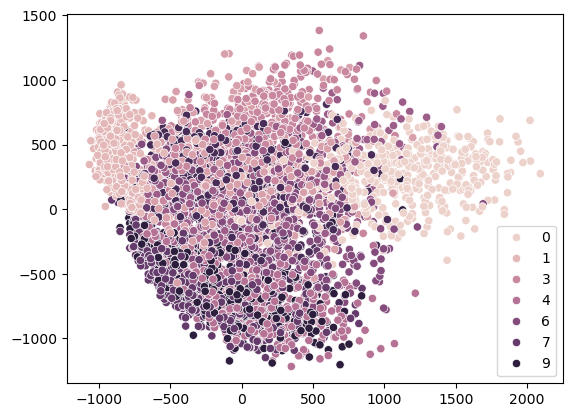

In [53]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue = target)

#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

Text(0, 0.5, 'Percent of Variance Explained')

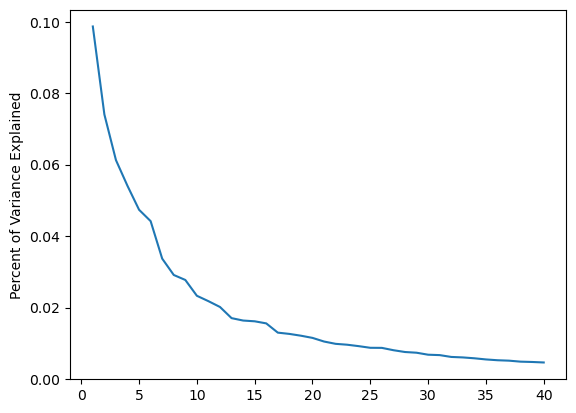

In [54]:
# Your code here
variance_explained = pca.explained_variance_ratio_
sns.lineplot(x=np.arange(1,41), y=variance_explained[0:40])
plt.ylabel("Percent of Variance Explained")

#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [55]:
# Your code here

cumulative = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative >= 0.95)
n_components

147

In [56]:
print(cumulative[140:150])

[0.94671656 0.94722377 0.94772292 0.94821944 0.9487107  0.94919261
 0.94966545 0.9501308  0.95059074 0.95104461]


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

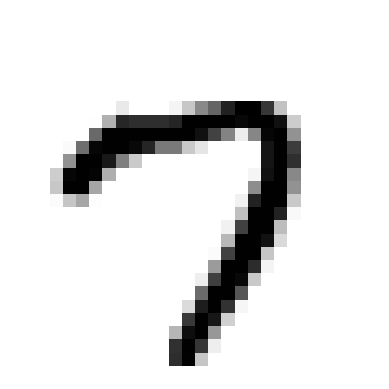

In [57]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

In [58]:
# Your code here
pca148 = PCA(n_components=n_components)
X_reduced = pca148.fit_transform(X)
X_reduced_inv = pca148.inverse_transform(X_reduced)
X_reduced_inv.shape, X.shape

((5000, 784), (5000, 784))

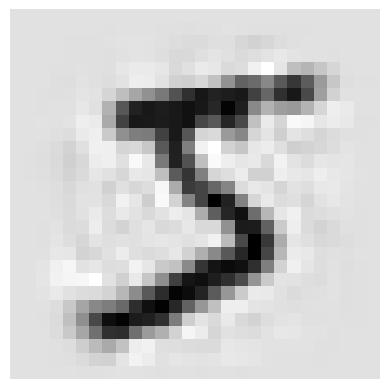

In [59]:
plot_mnist_digit(X_reduced_inv[0])

### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [81]:
# Your code here
# Without PCA
knn = KNeighborsClassifier()
knn.fit(X_mnist_train, y_mnist_train)
y_pred = knn.predict(X_mnist_test)
print(f"Original Data Accuracy: {accuracy_score(y_mnist_test, y_pred)}")

# With PCA
pca = PCA(0.80)
X_mnist_train_pca = pca.fit_transform(X_mnist_train)
X_mnist_test_pca = pca.transform(X_mnist_test)

knn_pca = KNeighborsClassifier()
knn_pca.fit(X_mnist_train_pca, y_mnist_train)
y_pred_pca = knn_pca.predict(X_mnist_test_pca)
print(f"PCA-transformed Data Accuracy: {accuracy_score(y_mnist_test, y_pred_pca)}")

Original Data Accuracy: 0.941
PCA-transformed Data Accuracy: 0.946


In [83]:
np.cumsum(pca.explained_variance_ratio_)

array([0.0987217 , 0.17274929, 0.23357077, 0.28771534, 0.33533428,
       0.3796925 , 0.4136662 , 0.44268169, 0.47047452, 0.49389696,
       0.51559022, 0.5354286 , 0.55225207, 0.56826127, 0.58417701,
       0.59979862, 0.61297555, 0.62576736, 0.63786936, 0.64953844,
       0.65997687, 0.66989834, 0.67944234, 0.68885312, 0.69769551,
       0.70637617, 0.71432855, 0.72186555, 0.72930286, 0.73614223,
       0.74279479, 0.74896603, 0.75503156, 0.76087073, 0.76641545,
       0.77174982, 0.77692353, 0.78173817, 0.78649889, 0.7911005 ,
       0.79550068, 0.79966372, 0.80373894])

In [61]:
X_mnist_train_pca.shape

(4000, 43)

## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

In [62]:
# Your code here
from sklearn.manifold import TSNE
tsne = TSNE()
X_tsne = tsne.fit_transform(X)

In [63]:
X_tsne.shape

(5000, 2)

<Axes: >

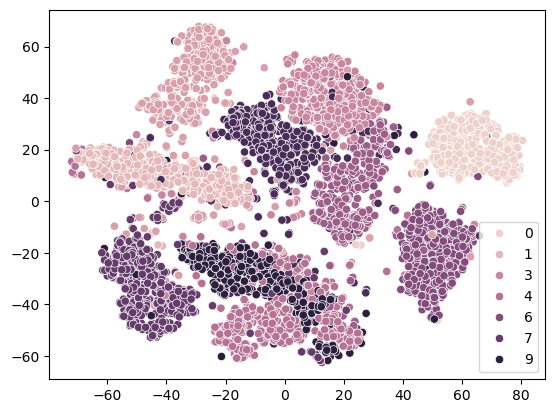

In [64]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue = target)

2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [65]:
# Your code here
X_mnist_train_tsne, X_mnist_test_tsne, y_mnist_train_tsne, y_mnist_test_tsne = train_test_split(X_tsne, y, test_size=0.2, random_state=42)
knn_tsne = KNeighborsClassifier()
knn_tsne.fit(X_mnist_train_tsne, y_mnist_train_tsne)
y_pred_tsne = knn_tsne.predict(X_mnist_test_tsne)
print(f"TSNE-transformed Data Accuracy: {accuracy_score(y_mnist_test_tsne, y_pred_tsne)}")

TSNE-transformed Data Accuracy: 0.932


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

In [66]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

# %pip install numpy==2.0
# %pip install umap-learn

In [67]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import TSNE
import umap
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import time

In [68]:
umap_obj = umap.UMAP(    init='random',
                    n_components=2,
                    n_neighbors=30,
                    min_dist=0.1,
                     spread=2,
                    metric='euclidean',
                    verbose=True)
X_umap = umap_obj.fit_transform(X)

UMAP(init='random', n_neighbors=30, spread=2, verbose=True)
Wed Sep 17 16:20:42 2025 Construct fuzzy simplicial set
Wed Sep 17 16:20:42 2025 Finding Nearest Neighbors
Wed Sep 17 16:20:42 2025 Building RP forest with 9 trees
Wed Sep 17 16:20:43 2025 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	Stopping threshold met -- exiting after 3 iterations
Wed Sep 17 16:20:43 2025 Finished Nearest Neighbor Search
Wed Sep 17 16:20:43 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Sep 17 16:20:44 2025 Finished embedding


<Axes: >

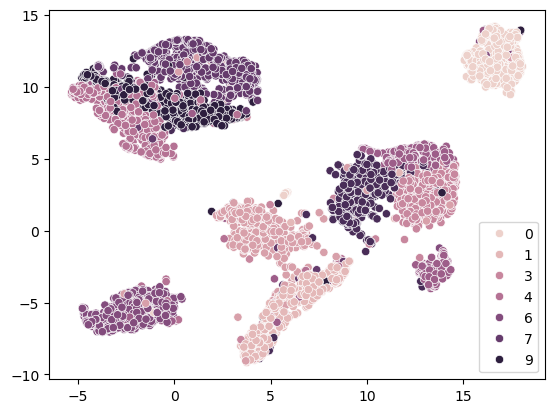

In [69]:
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue = target)

Now, calculate accuracy with KNN.

In [70]:
# Your code here
# With umap
umap_obj = umap.UMAP(    init='random',
                    n_components=2,
                    n_neighbors=30,
                    min_dist=0.1,
                     spread=2,
                    metric='euclidean',
                    verbose=True)
X_mnist_train_umap = umap_obj.fit_transform(X_mnist_train)
X_mnist_test_umap = umap_obj.transform(X_mnist_test)

knn_umap = KNeighborsClassifier()
knn_umap.fit(X_mnist_train_umap, y_mnist_train)
y_pred_umap = knn_umap.predict(X_mnist_test_umap)
print(f"UMAP-transformed Data Accuracy: {accuracy_score(y_mnist_test, y_pred_umap)}")

UMAP(init='random', n_neighbors=30, spread=2, verbose=True)
Wed Sep 17 16:20:44 2025 Construct fuzzy simplicial set
Wed Sep 17 16:20:52 2025 Finding Nearest Neighbors
Wed Sep 17 16:20:52 2025 Finished Nearest Neighbor Search
Wed Sep 17 16:20:52 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Sep 17 16:20:54 2025 Finished embedding


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
UMAP-transformed Data Accuracy: 0.867


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


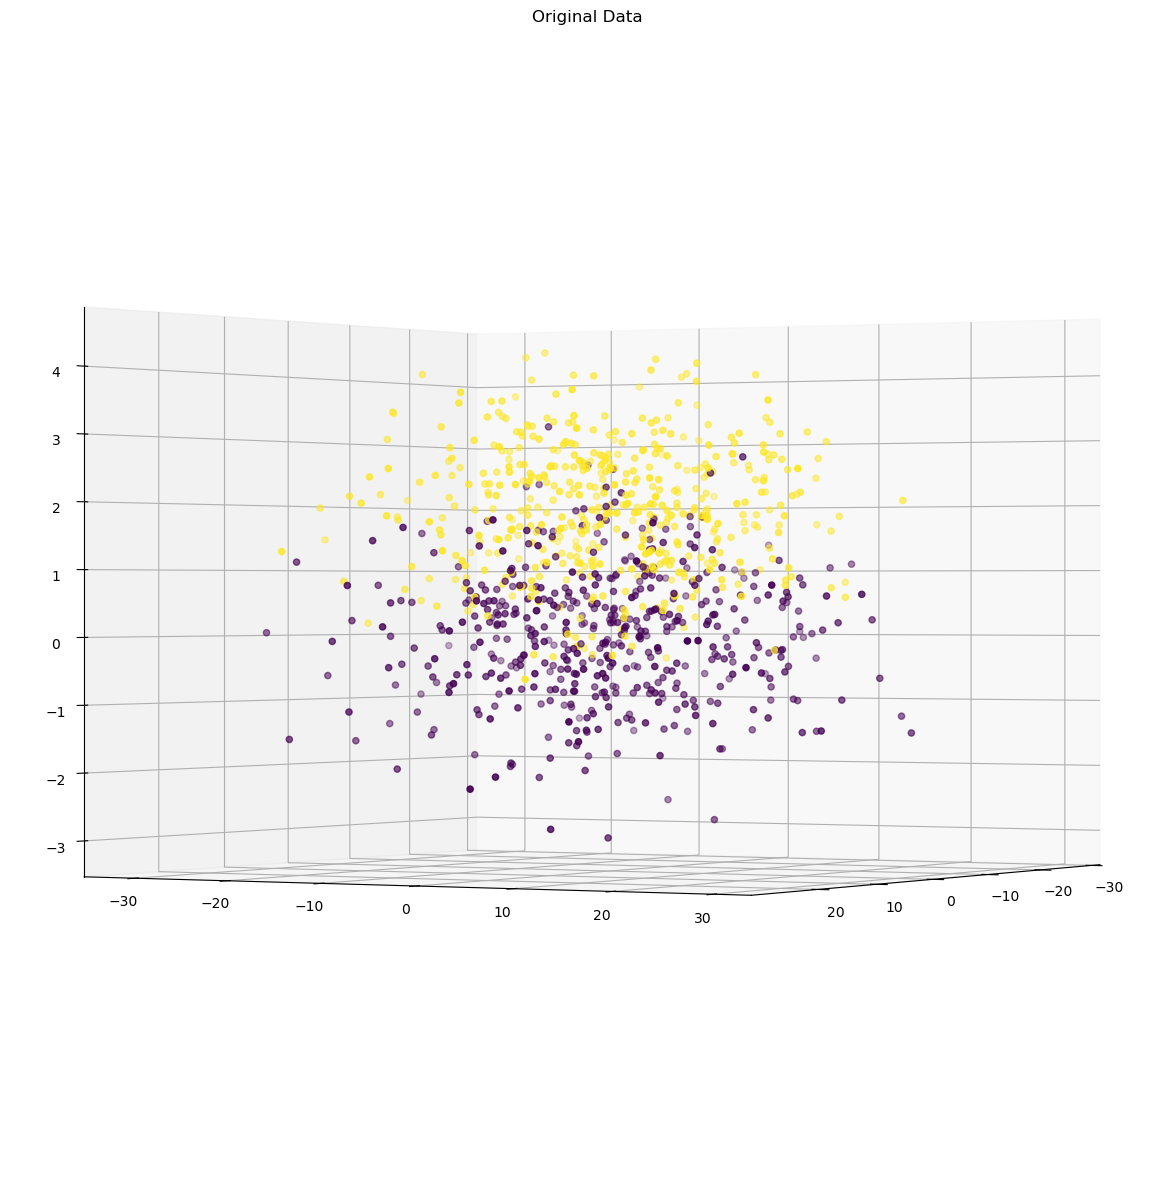

In [71]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [72]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

In [73]:
# Your code here
# With PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
print(f"PCA-transformed Data Accuracy: {accuracy_score(y_test, y_pred_pca)}")

PCA-transformed Data Accuracy: 0.725


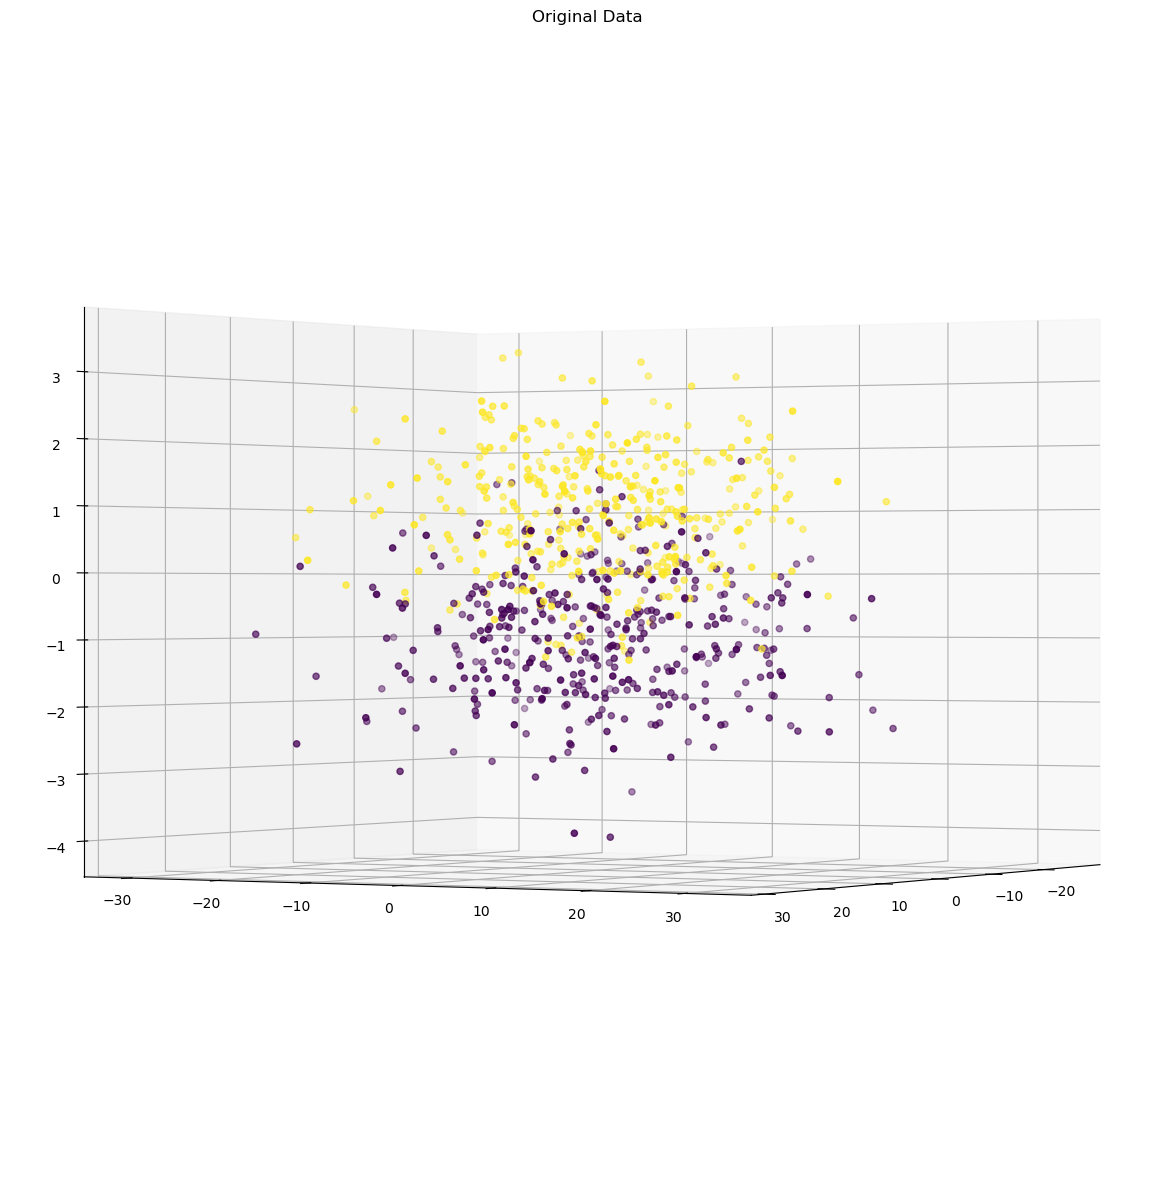

In [74]:
# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis')
ax.set_title('Original Data')

plt.show()

In [75]:
# Your code here
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
print(f"PCA-transformed Data Accuracy: {accuracy_score(y_test, y_pred_pca)}")

PCA-transformed Data Accuracy: 0.505


<Axes: >

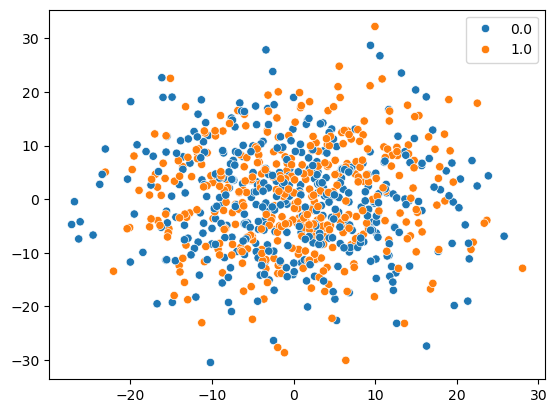

In [76]:
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train)

2. Try with UMAP.

In [77]:
# Your code here
umap_obj = umap.UMAP(    init='random',
                    n_components=3,
                    n_neighbors=30,
                    min_dist=0.1,
                     spread=2,
                    metric='euclidean',
                    verbose=True)
X_train_umap = umap_obj.fit_transform(X_train)
X_test_umap = umap_obj.transform(X_test)

knn_umap = KNeighborsClassifier()
knn_umap.fit(X_train_umap, y_train)
y_pred_umap = knn_umap.predict(X_test_umap)
print(f"UMAP-transformed Data Accuracy: {accuracy_score(y_test, y_pred_umap)}")

UMAP(init='random', n_components=3, n_neighbors=30, spread=2, verbose=True)
Wed Sep 17 16:20:58 2025 Construct fuzzy simplicial set
Wed Sep 17 16:20:58 2025 Finding Nearest Neighbors
Wed Sep 17 16:20:58 2025 Finished Nearest Neighbor Search
Wed Sep 17 16:20:58 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Sep 17 16:20:59 2025 Finished embedding


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
UMAP-transformed Data Accuracy: 0.575


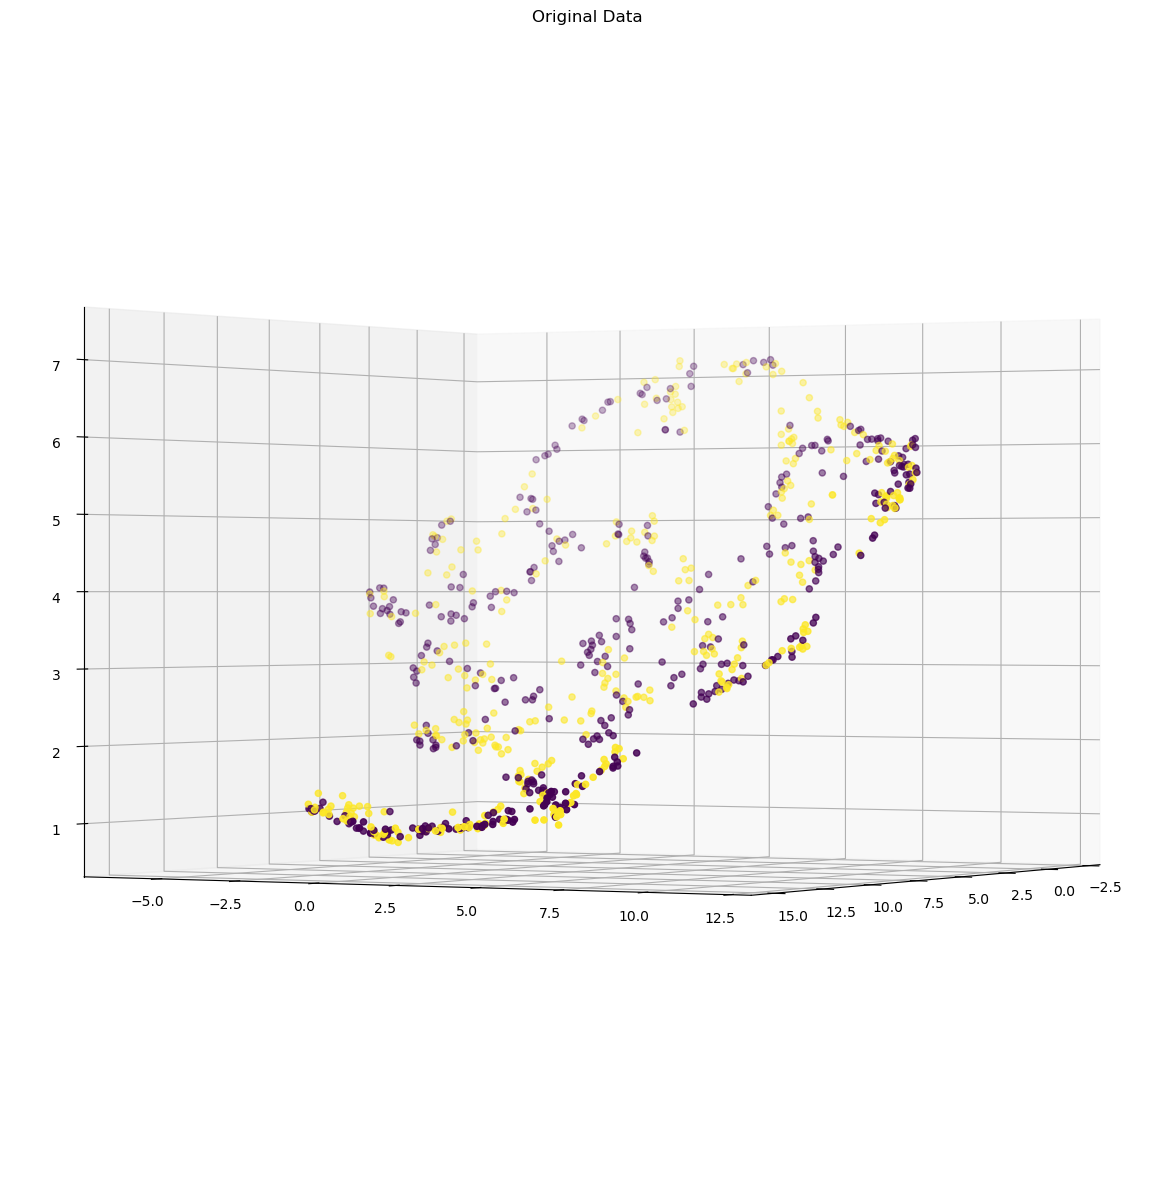

In [78]:
# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X_train_umap[:, 0], X_train_umap[:, 1], X_train_umap[:, 2], c=y_train, cmap='viridis')
ax.set_title('Original Data')

plt.show()

In [79]:
# Your code here
umap_obj = umap.UMAP(    init='random',
                    n_components=100,
                    n_neighbors=32,
                    min_dist=0.2,
                     spread=3,
                    metric='euclidean',
                    verbose=True)
X_train_umap = umap_obj.fit_transform(X_train)
X_test_umap = umap_obj.transform(X_test)

knn_umap = KNeighborsClassifier()
knn_umap.fit(X_train_umap, y_train)
y_pred_umap = knn_umap.predict(X_test_umap)
print(f"UMAP-transformed Data Accuracy: {accuracy_score(y_test, y_pred_umap)}")

UMAP(init='random', min_dist=0.2, n_components=100, n_neighbors=32, spread=3, verbose=True)
Wed Sep 17 16:20:59 2025 Construct fuzzy simplicial set
Wed Sep 17 16:20:59 2025 Finding Nearest Neighbors
Wed Sep 17 16:20:59 2025 Finished Nearest Neighbor Search
Wed Sep 17 16:20:59 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Sep 17 16:21:00 2025 Finished embedding


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
UMAP-transformed Data Accuracy: 0.57


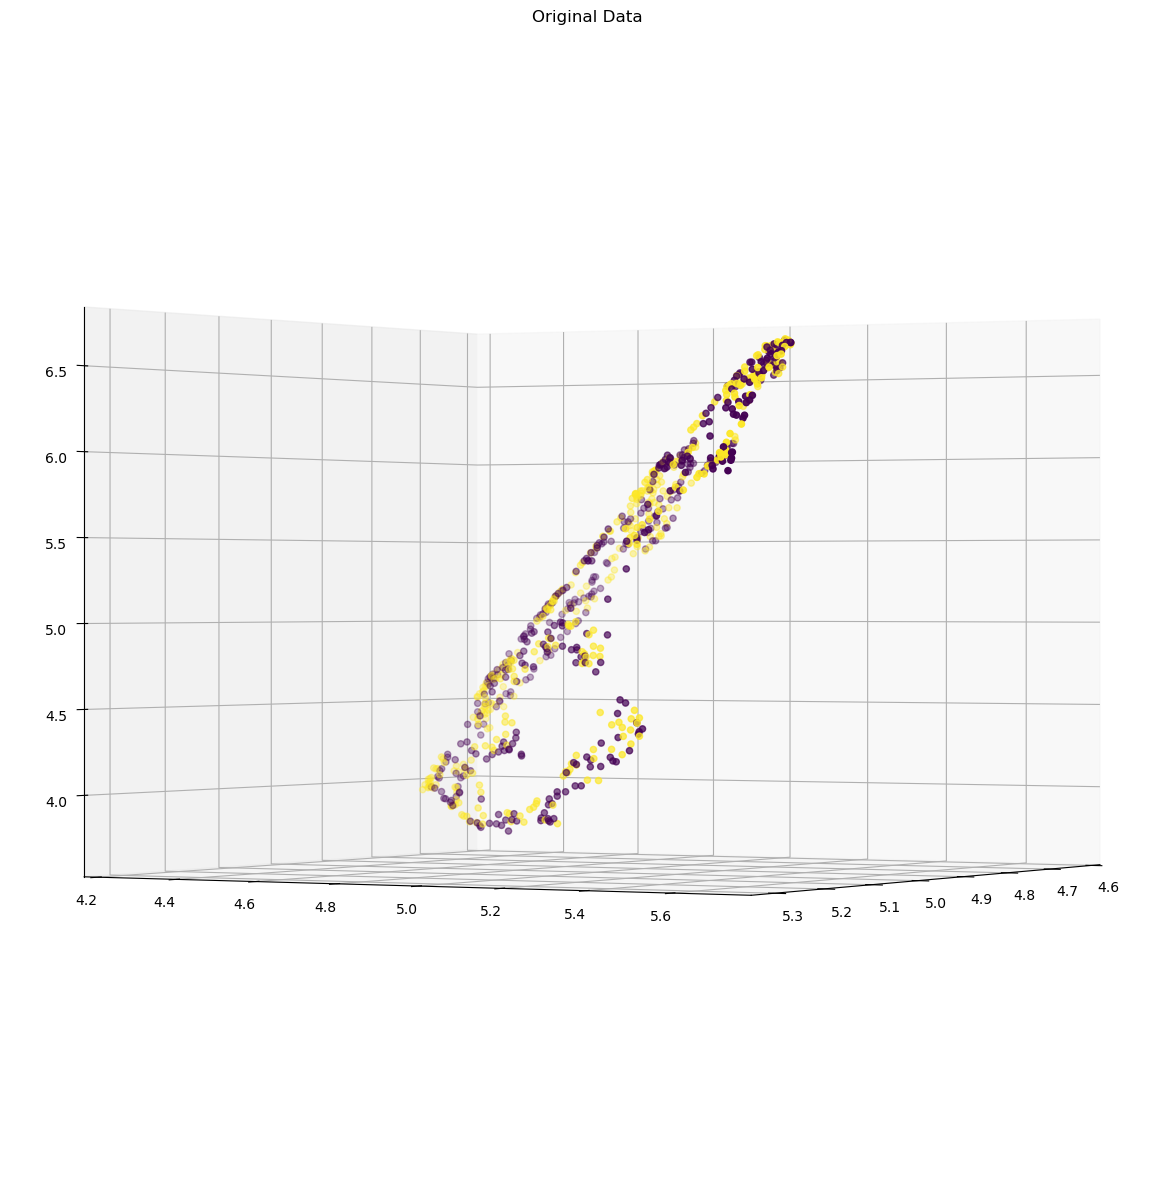

In [80]:
# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X_train_umap[:, 0], X_train_umap[:, 1], X_train_umap[:, 2], c=y_train, cmap='viridis')
ax.set_title('Original Data')

plt.show()

Explain your results in the cell below.  Which works better?  Why?

PCA worked better than UMAP because the data is not a manifold; it's just a giant blob. UMAP tries to find a lower dimensional structure that isn't there.